# Student performance indicator
Life Cycle of Model Development

Model Development Stages:
1. Data Collection
2. Data Preprocessing
3. Feature Engineering
4. Model Selection
5. Model Training
6. Model Evaluation      

## 1) Problem Statement
This dataset understands how the student's performance is affected by other variables such as Parental Level of education, Lunch, Test Preparation Scores 

## 2) Data 
- Dataset Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- Data contains 1000 rows and 8 columns

###  2.1) Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Show top 5 Records


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of Data set

In [5]:
df.shape

(1000, 8)

## 3) Datachecks to perform
- Check Missing values
- Check duplicates
- Check data type
- Check the number of unique variables in each column
- Check statistics of dataset
- Check various categories present in different in categorical columns

### 3.1) Missing values check

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data has no missing values

### 3.2) Check duplicates

In [7]:
df.duplicated().sum()


np.int64(0)

There are no duplicates

### 3.3) Check data types

In [8]:
## Check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check number of unique values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5) Check statistic of data

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.6) Exploring Data

In [11]:
print("Categories in gender variable:       ", end = " ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable:      ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable:      ", end = " ")
print(df['parental level of education'].unique())

print("Categories in lunch variable:      ", end = " ")
print(df['lunch'].unique())

print("Categories in test preparation course  variable:      ", end = " ")
print(df['test preparation course'].unique())

Categories in gender variable:        ['female' 'male']
Categories in race/ethnicity variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:       ['standard' 'free/reduced']
Categories in test preparation course  variable:       ['none' 'completed']


In [12]:
# define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(" We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print(" \nWe have {} categorical features : {}".format(len(categorical_features),categorical_features))


 We have 3 numerical features : ['math score', 'reading score', 'writing score']
 
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for "Total Score" and "Average"

In [13]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total Score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Total Score'].count()
math_full = df[df['math score'] == 100].shape[0]

print(f'Number of students with full score in Reading: {reading_full}')
print(f'Number of students with full score in Writing: {writing_full}')
print(f'Number of students with full score in Math: {math_full}')


Number of students with full score in Reading: 17
Number of students with full score in Writing: 14
Number of students with full score in Math: 7


In [15]:
reading_less_20 = df[df['reading score'] < 20]['Average'].count()
writing_less_20 = df[df['writing score'] < 20]['Average'].count()
math_less_20 = df[df['math score'] < 20]['Average'].count()

print(f'Number of students with less than 20 score in Reading: {reading_less_20}')
print(f'Number of students with less than 20 score in Writing: {writing_less_20}')
print(f'Number of students with less than 20 score in Math: {math_less_20}')


Number of students with less than 20 score in Reading: 1
Number of students with less than 20 score in Writing: 3
Number of students with less than 20 score in Math: 4


### 4. Visualization

Visualize average score distribution using 
- Histogram
- Kernel Distribution Function 

#### Histogram & KDE

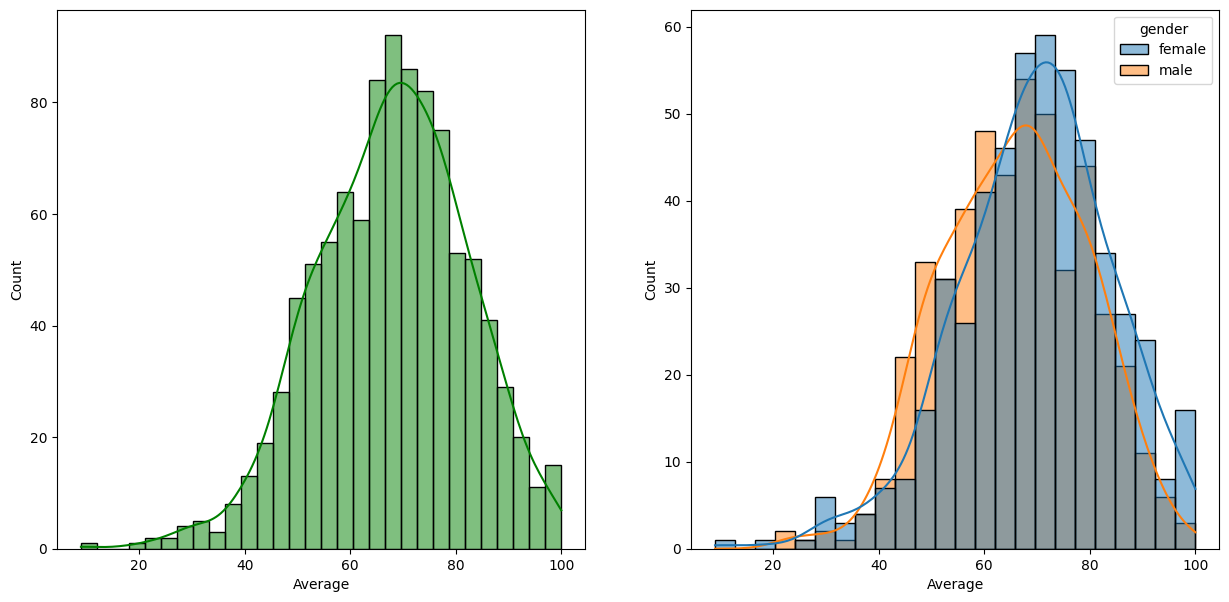

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average', kde = True, color = 'g', bins = 30)
plt.subplot(122)
sns.histplot(data = df, x = 'Average', fill = True, kde = True, hue = 'gender')
plt.show()

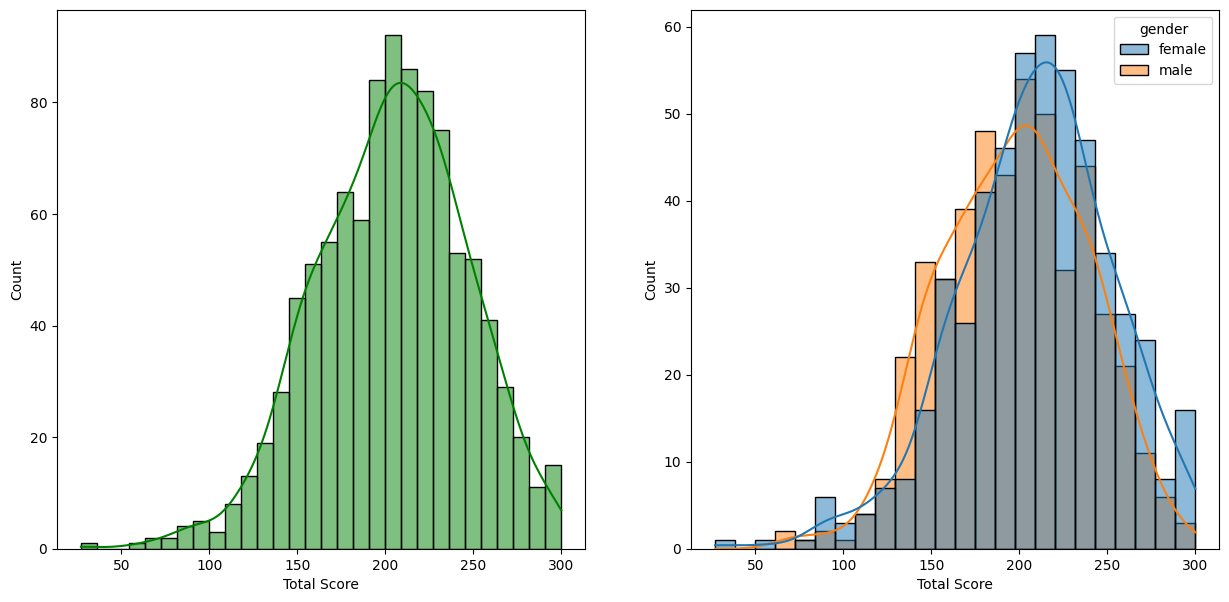

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Total Score', kde = True, color = 'g', bins = 30)
plt.subplot(122)
sns.histplot(data = df, x = 'Total Score', fill = True, kde = True, hue = 'gender')
plt.show()

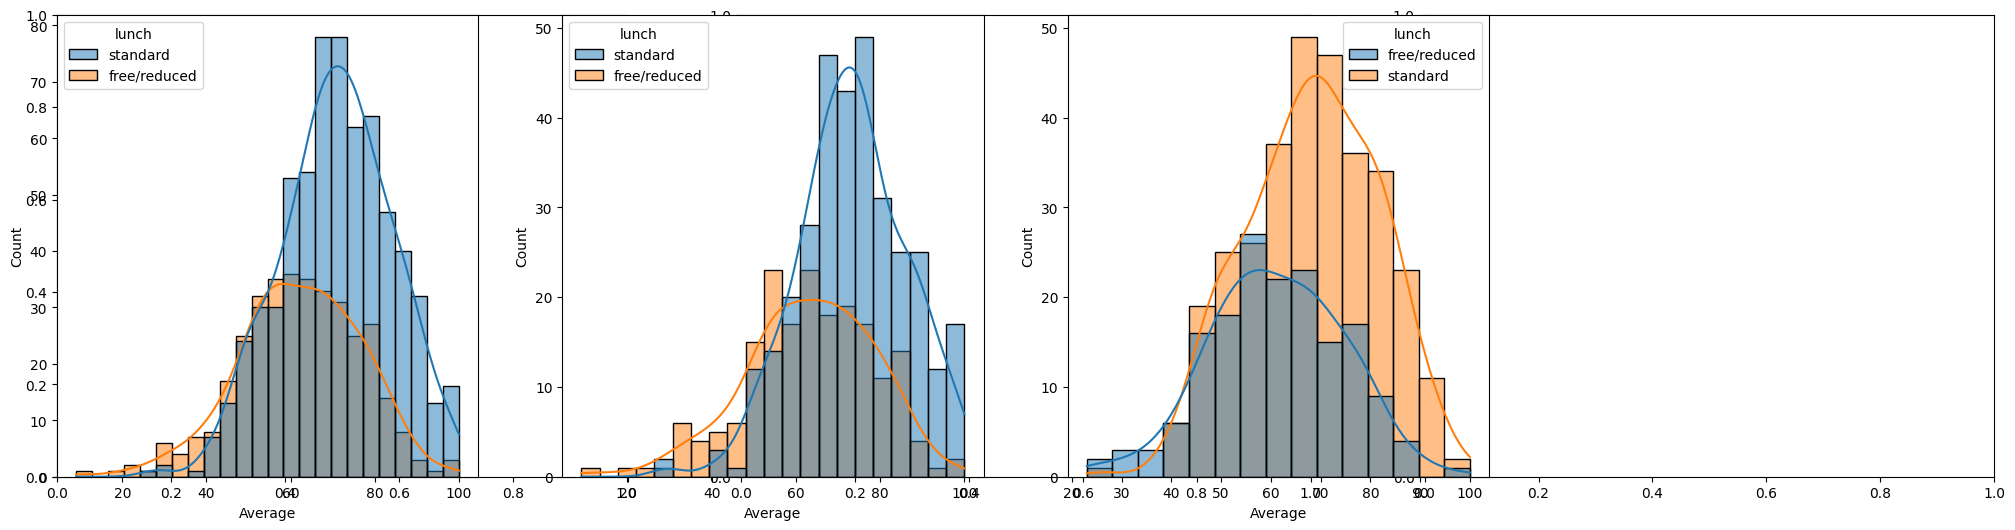

In [18]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()

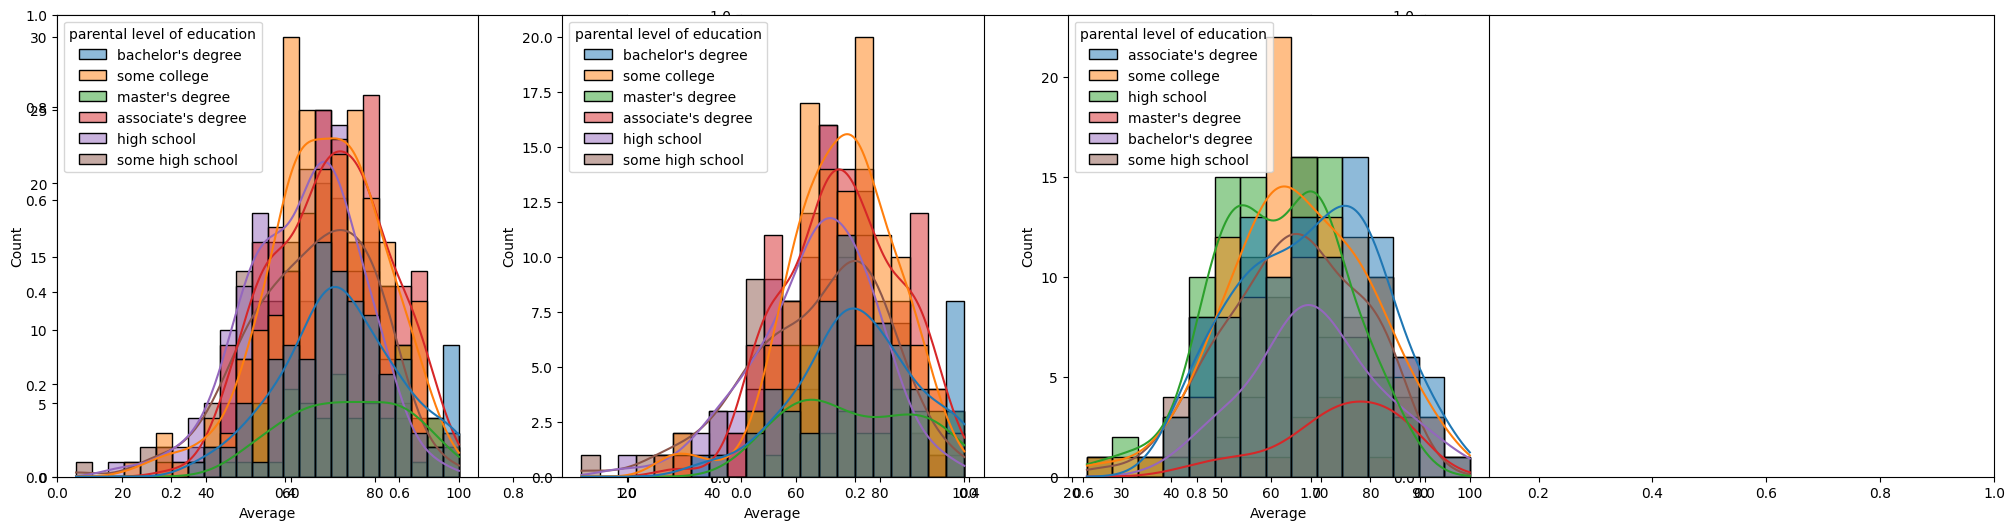

In [19]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'parental level of education')
plt.show()

### Score distribution

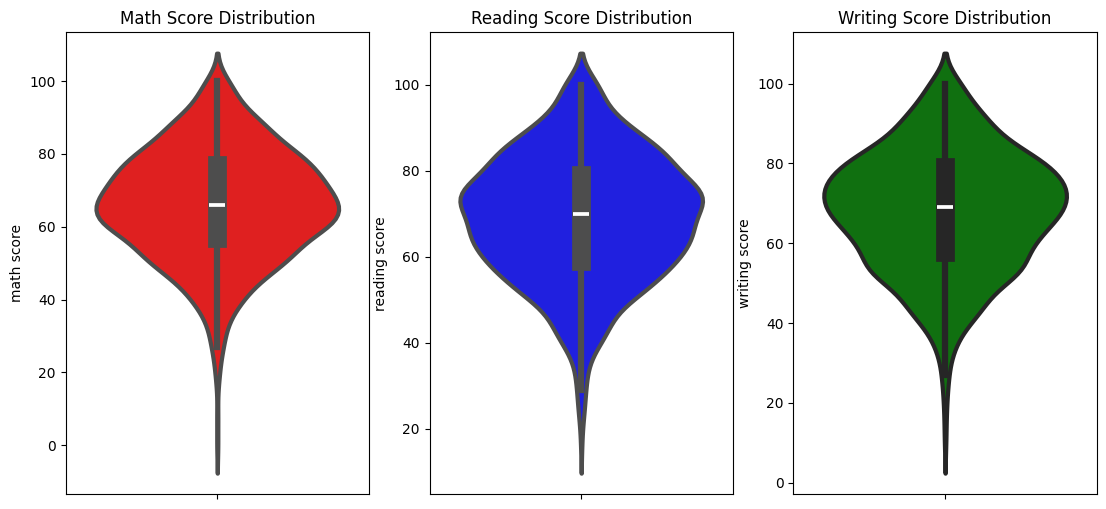

In [21]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.title('Math Score Distribution')
sns.violinplot(y='math score', data = df ,color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score Distribution')
sns.violinplot(y='reading score', data = df ,color='blue', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score Distribution')
sns.violinplot(y='writing score', data = df ,color='green', linewidth=3)
plt.show()

### Average by Gender

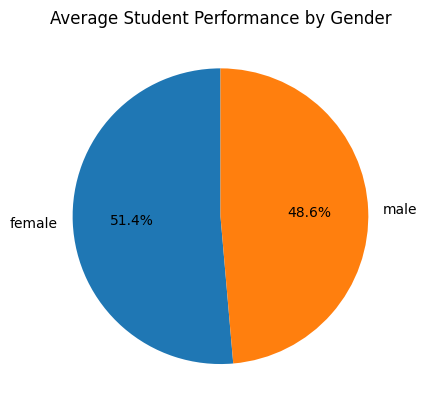

In [22]:
avg_by_gender = df.groupby('gender')['Average'].mean()

# Plot
plt.pie(avg_by_gender, labels=avg_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title("Average Student Performance by Gender")
plt.show()

### Average by Parental Education level

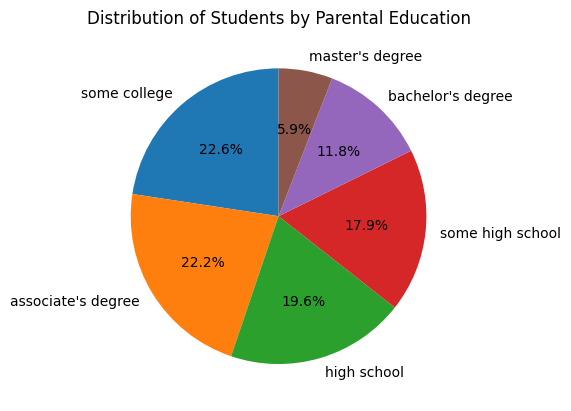

In [23]:
parent_counts = df['parental level of education'].value_counts()

plt.pie(parent_counts, labels=parent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Students by Parental Education")
plt.show()

### Analysing multiple variables at once : Performance Level and Gender

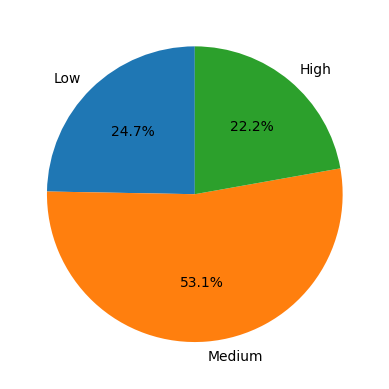

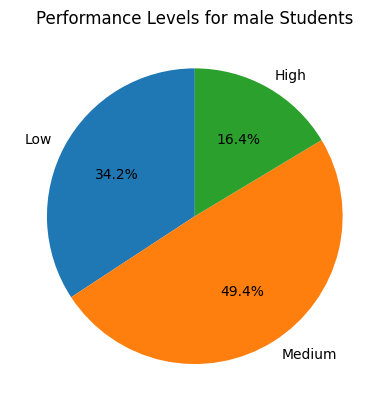

In [28]:
df['performance_level'] = pd.cut(df['Average'], bins =[0,60,80,100], labels=['Low', 'Medium', 'High'])

count_data = df.groupby(['gender', 'performance_level']).size().unstack()

for gender in count_data.index:
    plt.figure()
    plt.pie(count_data.loc[gender],
            labels=count_data.columns,
            autopct='%1.1f%%',
            startangle=90)

plt.title(f'Performance Levels for {gender} Students')
plt.show()

### Parental Education vs Gender vs Performance Level - Actual Counts

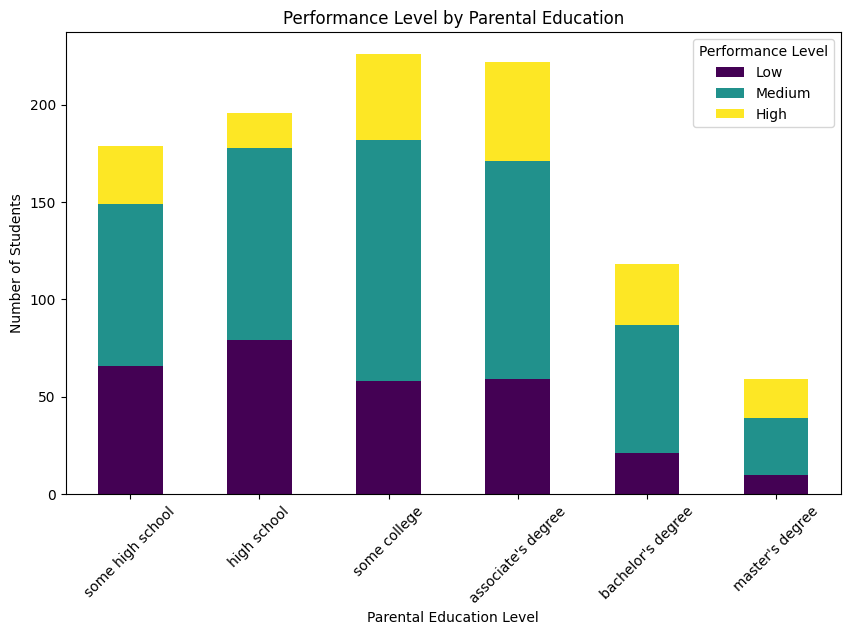

In [34]:
edu_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

cross_tab = pd.crosstab(df['parental level of education'], df['performance_level'])
# Reindex rows according to custom order
cross_tab = cross_tab.reindex(edu_order)

cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title('Performance Level by Parental Education')
plt.xlabel('Parental Education Level')
plt.ylabel('Number of Students')
plt.legend(title='Performance Level')
plt.xticks(rotation=45)
plt.show()

### Parental Education vs Gender vs Performance Level - Percentage

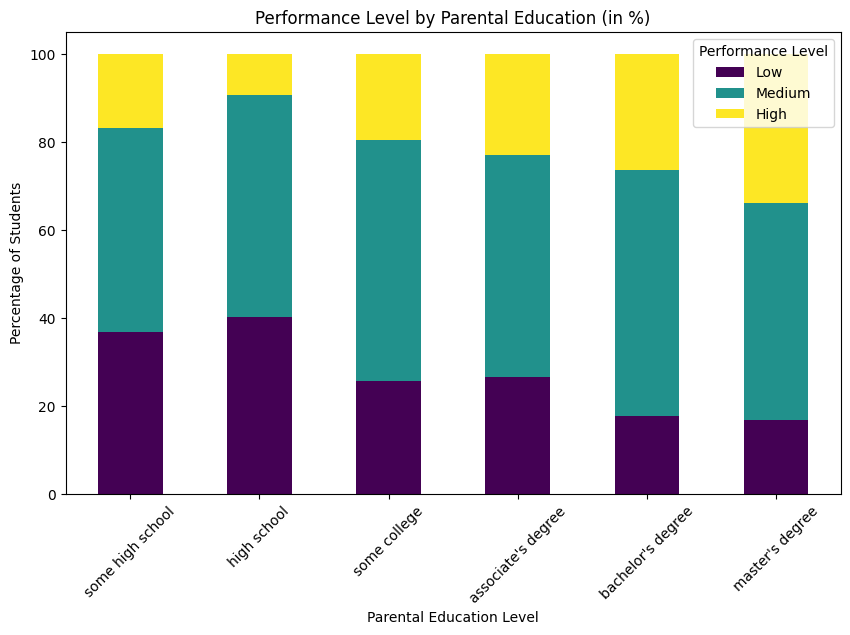

In [35]:
edu_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Create crosstab (counts)
cross_tab = pd.crosstab(df['parental level of education'], df['performance_level'])

# Reindex rows according to custom order
cross_tab = cross_tab.reindex(edu_order)

# Convert counts to percentages (row-wise)
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title('Performance Level by Parental Education (in %)')
plt.xlabel('Parental Education Level')
plt.ylabel('Percentage of Students')
plt.legend(title='Performance Level')
plt.xticks(rotation=45)
plt.show()
